# Load dataset

### Lihat isi folder dataset

In [1]:
import kagglehub
path = kagglehub.dataset_download("onsrajhi/book-recommendation-system")

print("Path to dataset files:", path)

100%|██████████| 23.8M/23.8M [00:01<00:00, 21.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/onsrajhi/book-recommendation-system/versions/1


In [2]:
import os

print("Files in dataset path:")
print(os.listdir(path))

Files in dataset path:
['Users.csv', 'Ratings.csv', 'Books.csv']


In [3]:
import pandas as pd

books = pd.read_csv(os.path.join(path, "Books.csv"))
users = pd.read_csv(os.path.join(path, "Users.csv"))
ratings = pd.read_csv(os.path.join(path, "Ratings.csv"))


<ipython-input-3-750e612e119a>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(os.path.join(path, "Books.csv"))


Jika diunduh dataset nya

In [4]:
# import pandas as pd

# books = pd.read_csv("Books.csv")
# users = pd.read_csv("Users.csv")
# ratings = pd.read_csv("Ratings.csv")

Ukuran masing-masing dataset

In [5]:
print("Books:", books.shape)
print("Users:", users.shape)
print("Ratings:", ratings.shape)


Books: (271360, 8)
Users: (278858, 3)
Ratings: (1149780, 3)


# Data Understanding

## Book

In [6]:
print("Kolom pada Books.csv:")
books.columns.tolist()

Kolom pada Books.csv:


['ISBN',
 'Book-Title',
 'Book-Author',
 'Year-Of-Publication',
 'Publisher',
 'Image-URL-S',
 'Image-URL-M',
 'Image-URL-L']

- ISBN: Singkatan dari International Standard Book Number. Ini adalah nomor identifikasi unik untuk setiap edisi buku yang diterbitkan secara komersial. Mirip dengan sidik jari untuk buku.
- Book-Title: Judul lengkap dari buku tersebut.
- Book-Author: Nama penulis atau para penulis dari buku tersebut.
- Year-Of-Publication: Tahun di mana buku tersebut pertama kali diterbitkan.
- Publisher: Nama penerbit buku tersebut.
- Image-URL-S: URL (alamat web) dari gambar sampul buku dalam ukuran kecil (Small).
- Image-URL-M: URL (alamat web) dari gambar sampul buku dalam ukuran sedang (Medium).
- Image-URL-L: URL (alamat web) dari gambar sampul buku dalam ukuran besar (Large).

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,3462017942,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [10]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [11]:
books[books['Year-Of-Publication'] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


### Melihat distribusi tahun publikasi

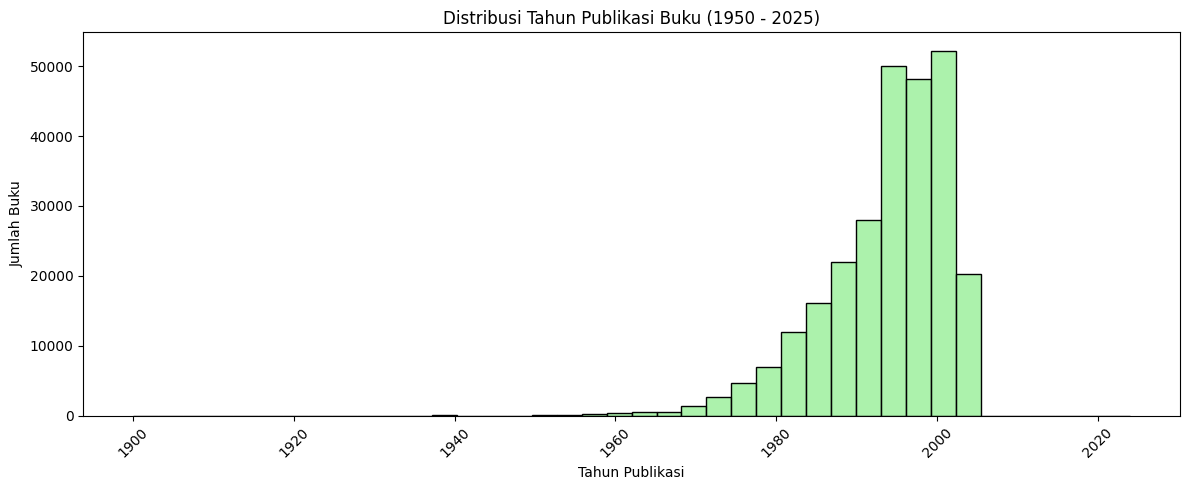

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

year_data = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

books_temp = books.copy()
books_temp['Year-Of-Publication'] = year_data

books_cleaned = books_temp.dropna(subset=['Year-Of-Publication']).copy()
books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(int)
books_filtered = books_cleaned[(books_cleaned['Year-Of-Publication'] >= 1900) &
                               (books_cleaned['Year-Of-Publication'] <= 2025)]

plt.figure(figsize=(12,5))
sns.histplot(books_filtered['Year-Of-Publication'], bins=40, kde=False, color='lightgreen')
plt.title("Distribusi Tahun Publikasi Buku (1950 - 2025)")
plt.xlabel("Tahun Publikasi")
plt.ylabel("Jumlah Buku")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Puncak publikasi buku terlihat jelas di sekitar tahun 2000-an. Batang-batang tertinggi berada di sekitar tahun 1990-an akhir hingga awal 2000-an, menunjukkan bahwa sebagian besar buku dalam dataset ini diterbitkan pada periode tersebut.


### 10 Penulis Terbanyak

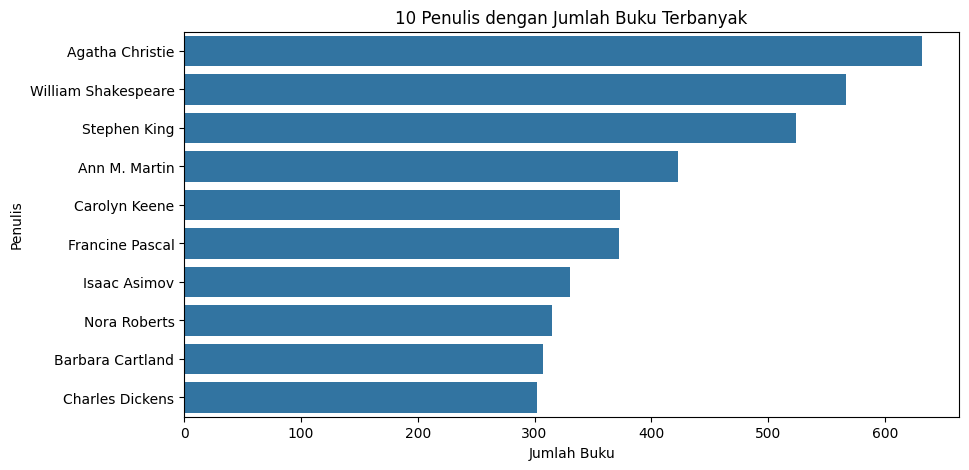

In [13]:
top_authors = books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("10 Penulis dengan Jumlah Buku Terbanyak")
plt.xlabel("Jumlah Buku")
plt.ylabel("Penulis")
plt.show()

Diagram menunjukkan bahwa Agatha Christie adalah penulis dengan jumlah buku terbanyak di antara 10 penulis teratas yang disajikan. diikuti oleh Wilian Shakespeare dan Stephen King.

### 10 Publisher Terbanyak

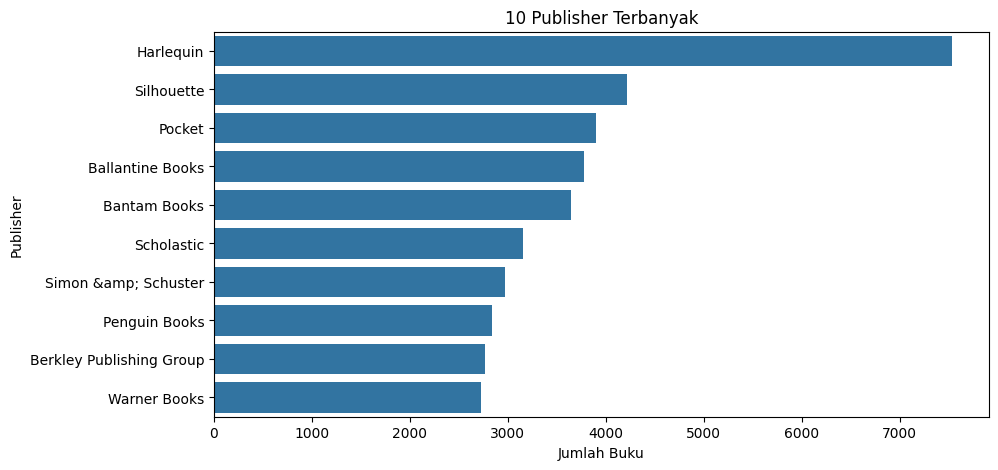

In [14]:
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("10 Publisher Terbanyak")
plt.xlabel("Jumlah Buku")
plt.ylabel("Publisher")
plt.show()

Diagram menunjukkan bahwa Harlequin adalah penerbit dengan jumlah buku terbanyak di antara 10 penerbit teratas yang disajikan. Hal ini mengindikasikan dominansi Harlequin dalam jumlah publikasi dibandingkan penerbit lain dalam dataset ini.

## User

In [15]:
print("Kolom pada Users.csv:")
users.columns.tolist()


Kolom pada Users.csv:


['User-ID', 'Location', 'Age']

- User-ID: Ini adalah nomor identifikasi unik untuk setiap pengguna dalam dataset.
- Location: Informasi lokasi geografis dari pengguna. Ini bisa berupa kota, negara, atau kombinasi keduanya.
- Age: Usia pengguna. Kolom ini bisa digunakan untuk memahami demografi pengguna atau dalam beberapa algoritma rekomendasi.

In [16]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


type data setiap kolom sudah benar dan sesuai.

In [18]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [19]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


terdapat banyak missing value pada kolom age.

### Distribusi umur pengguna

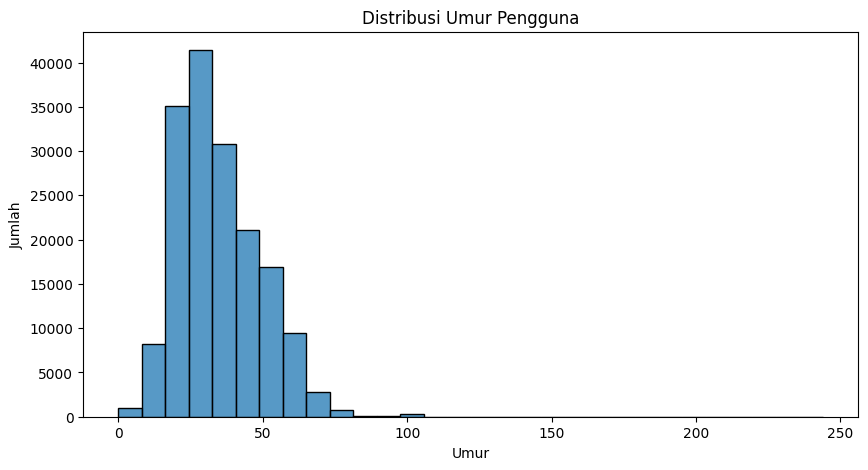

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(users['Age'], bins=30, kde=False)
plt.title("Distribusi Umur Pengguna")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

Diagram menunjukkan bahwa sebagian besar pengguna berada dalam rentang usia muda hingga dewasa (sekitar 20-40 tahun). Distribusi usia pengguna tampak right-skewed, dengan jumlah pengguna menurun signifikan seiring bertambahnya usia.

### Lokasi teratas

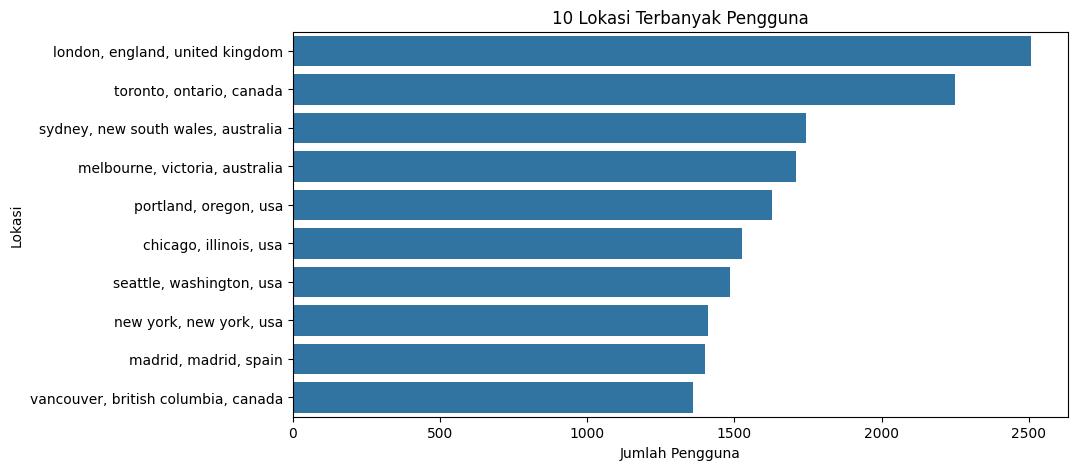

In [21]:
top_locations = users['Location'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("10 Lokasi Terbanyak Pengguna")
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Lokasi")
plt.show()

Diagram menunjukkan bahwa London, England, United Kingdom memiliki jumlah pengguna terbanyak, diikuti oleh Toronto, Ontario, Canada. Hal ini mengindikasikan bahwa sebagian besar pengguna dalam dataset ini terkonsentrasi di beberapa kota besar, terutama di Inggris dan Kanada.

## Rating

In [22]:
print("Kolom pada Ratings.csv:")
ratings.columns.tolist()

Kolom pada Ratings.csv:


['User-ID', 'ISBN', 'Book-Rating']

- Book-Rating: penilaian atau skor yang diberikan oleh seorang pengguna kepada sebuah buku.

In [23]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


data sudah bersih dan terhindar dari missing value dan type data sudah sesuai.

In [25]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [26]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


### Distribusi rating (0 berarti implicit feedback)

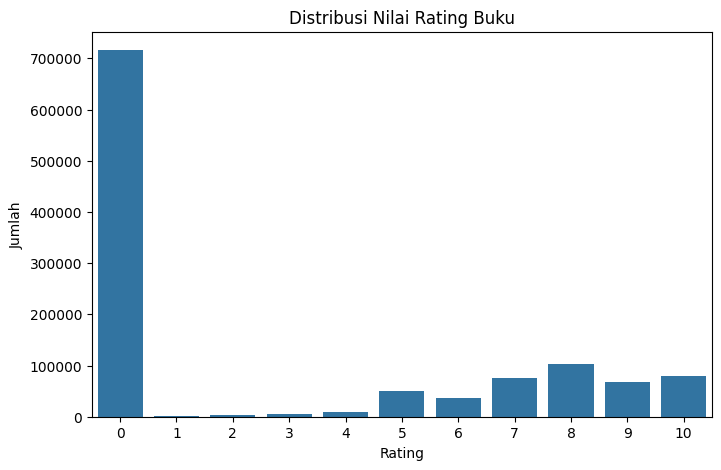

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=ratings)
plt.title("Distribusi Nilai Rating Buku")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()


Diagram menunjukkan bahwa sebagian besar rating buku yang diberikan adalah 0. Ini mengindikasikan bahwa mayoritas interaksi pengguna merupakan implicit feedback, di mana buku dilihat atau dibaca tanpa rating eksplisit.

### Persentase rating eksplisit vs implisit

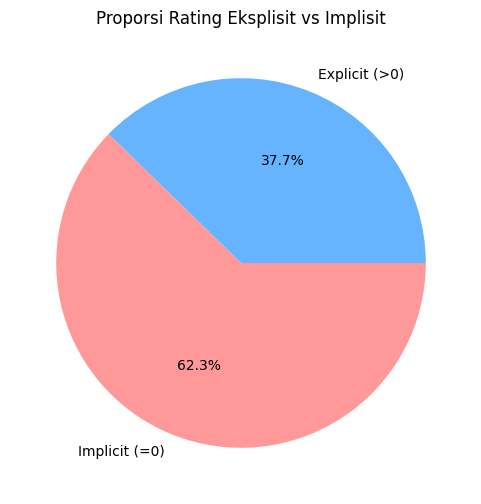

In [28]:
explicit = ratings[ratings['Book-Rating'] > 0].shape[0]
implicit = ratings[ratings['Book-Rating'] == 0].shape[0]

plt.figure(figsize=(6,6))
plt.pie([explicit, implicit], labels=['Explicit (>0)', 'Implicit (=0)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Proporsi Rating Eksplisit vs Implisit")
plt.show()

Diagram pai menunjukkan bahwa mayoritas interaksi pengguna dengan buku adalah implisit (62.3%), sementara rating eksplisit menyumbang 37.7%.

Book-Rating = 0 artinya pengguna telah berinteraksi (misalnya melihat atau membaca buku) tapi tidak memberikan rating eksplisit. Maka ini dianggap feedback implisit — sinyal bahwa user "mungkin tertarik", tapi tidak menyatakan suka/tidak suka secara eksplisit.

# Bivariate EDA

## Jumlah rating per user

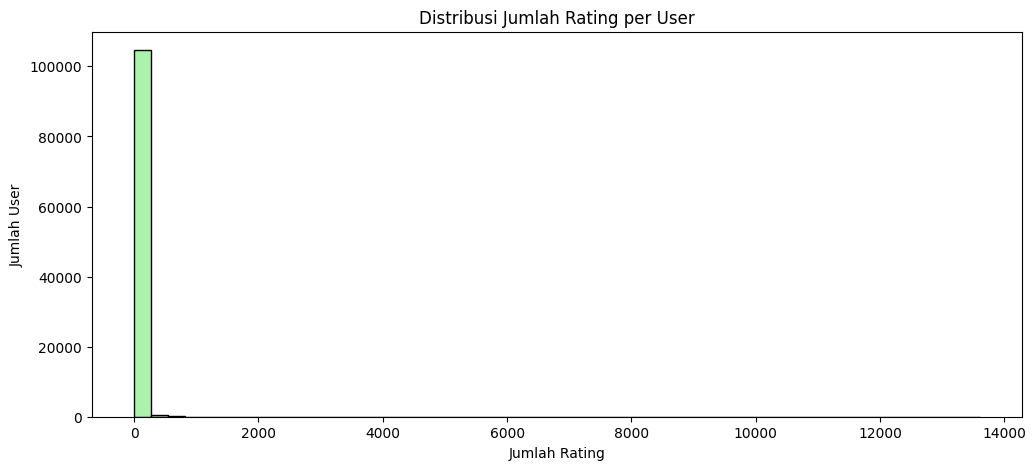

In [29]:
ratings_per_user = ratings.groupby('User-ID').size().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(ratings_per_user, bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribusi Jumlah Rating per User")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah User")
plt.show()

Mayoritas pengguna hanya memberikan sedikit ulasan, dengan puncak distribusi yang sangat tinggi di dekat angka nol "Jumlah Rating". Sebagian besar pengguna memberikan ulasan dalam jumlah yang sangat kecil. Hanya sedikit pengguna yang memberikan ulasan dalam jumlah yang banyak.

## Jumlah rating per buku

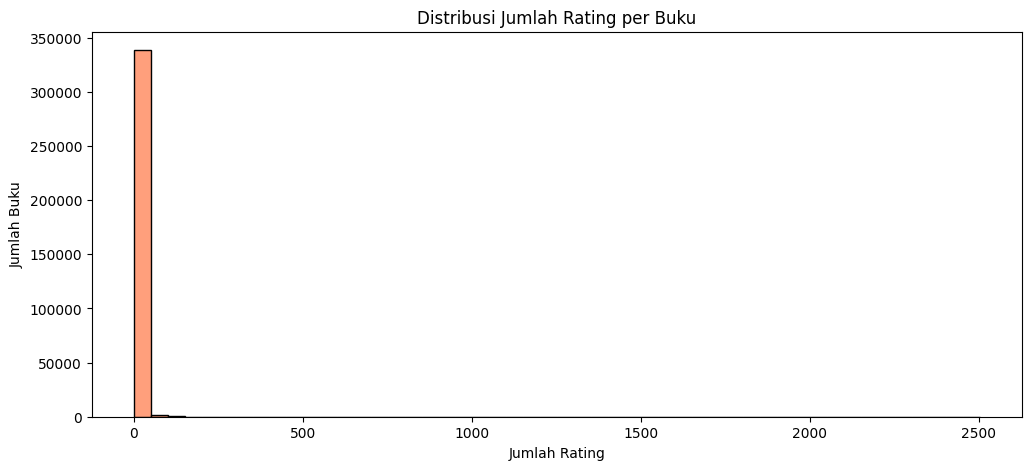

In [30]:
ratings_per_book = ratings.groupby('ISBN').size().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.histplot(ratings_per_book, bins=50, color='coral', edgecolor='black')
plt.title("Distribusi Jumlah Rating per Buku")
plt.xlabel("Jumlah Rating")
plt.ylabel("Jumlah Buku")
plt.show()

Mayoritas buku hanya menerima sedikit ulasan, dengan puncak distribusi yang sangat tinggi di dekat angka nol "Jumlah Rating". Sebagian besar buku memiliki jumlah ulasan yang sangat minim. Hanya sejumlah kecil buku yang menerima ulasan dalam jumlah yang banyak.

## Rata-rata rating per buku

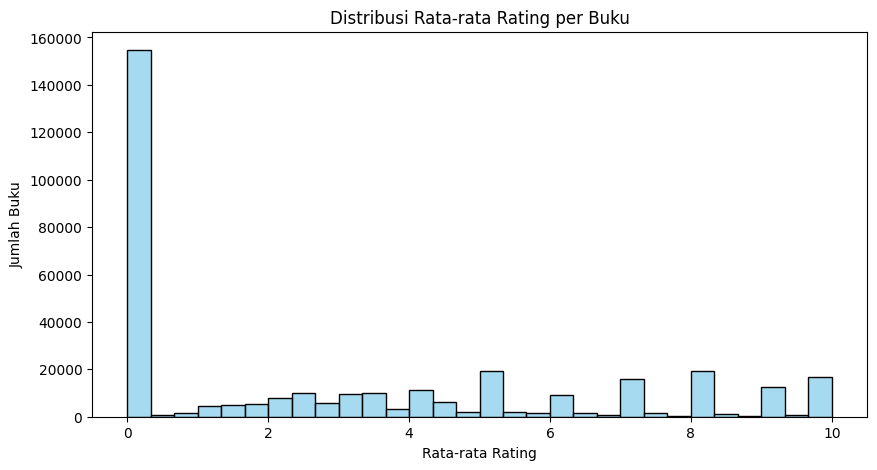

In [31]:
avg_rating_per_book = ratings.groupby('ISBN')['Book-Rating'].mean()
plt.figure(figsize=(10,5))
sns.histplot(avg_rating_per_book, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Rata-rata Rating per Buku")
plt.xlabel("Rata-rata Rating")
plt.ylabel("Jumlah Buku")
plt.show()

Mayoritas buku memiliki rata-rata rating yang sangat rendah, dengan puncak distribusi yang signifikan di dekat angka nol "Rata-rata Rating". Meskipun demikian, terdapat distribusi rata-rata rating yang menyebar dari sekitar 1 hingga 10, menunjukkan adanya buku dengan rata-rata rating yang bervariasi. Ada sejumlah kecil buku yang menerima rata-rata rating tinggi, menunjukkan bahwa sebagian buku sangat disukai.

## Rata-rata rating per user

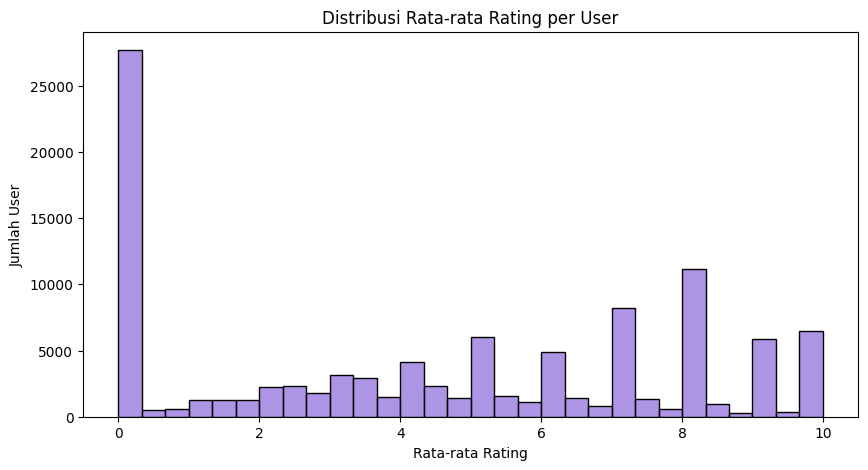

In [32]:
avg_rating_per_user = ratings.groupby('User-ID')['Book-Rating'].mean()
plt.figure(figsize=(10,5))
sns.histplot(avg_rating_per_user, bins=30, color='mediumpurple', edgecolor='black')
plt.title("Distribusi Rata-rata Rating per User")
plt.xlabel("Rata-rata Rating")
plt.ylabel("Jumlah User")
plt.show()

Sebagian besar pengguna memiliki rata-rata rating yang sangat rendah, terlihat dari puncak tinggi di dekat angka nol "Rata-rata Rating". Meskipun demikian, terdapat sebaran rata-rata rating pengguna dari sekitar 1 hingga 10, menunjukkan adanya variasi preferensi pengguna. Terdapat juga sejumlah pengguna yang memberikan rata-rata rating tinggi, khususnya di sekitar 8 dan 10, mengindikasikan kepuasan yang tinggi dari kelompok pengguna tersebut.

## Scatter plot jumlah rating vs rata-rata rating (User)

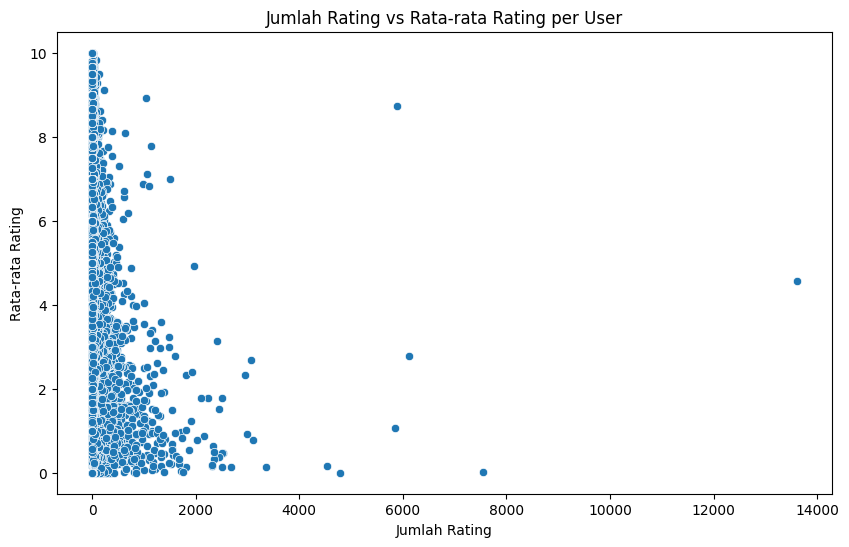

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=ratings_per_user, y=avg_rating_per_user)
plt.title("Jumlah Rating vs Rata-rata Rating per User")
plt.xlabel("Jumlah Rating")
plt.ylabel("Rata-rata Rating")
plt.show()

Mayoritas pengguna memberikan jumlah rating yang sedikit, dengan rata-rata rating yang bervariasi dari 0 hingga 10. Terlihat konsentrasi titik-titik di area "Jumlah Rating" rendah, menunjukkan bahwa sebagian besar pengguna hanya memberikan ulasan dalam jumlah kecil. Tidak ada korelasi yang jelas antara jumlah rating yang diberikan oleh pengguna dengan rata-rata rating yang mereka berikan.

## Scatter plot jumlah rating vs rata-rata rating (Buku)

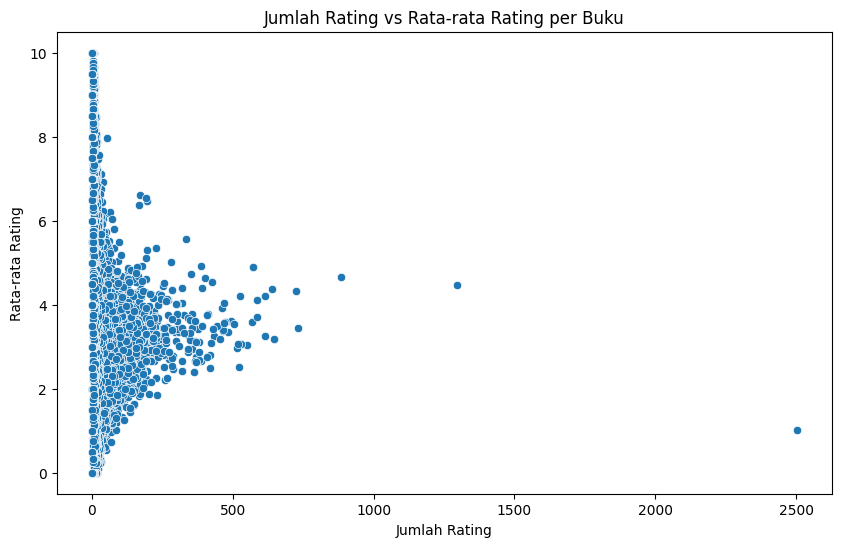

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=ratings_per_book, y=avg_rating_per_book)
plt.title("Jumlah Rating vs Rata-rata Rating per Buku")
plt.xlabel("Jumlah Rating")
plt.ylabel("Rata-rata Rating")
plt.show()


Mayoritas buku menerima jumlah rating yang sedikit, dengan rata-rata rating yang tersebar dari 0 hingga 10. Terlihat konsentrasi titik-titik di area "Jumlah Rating" rendah, menunjukkan bahwa sebagian besar buku hanya memiliki ulasan dalam jumlah kecil. Tidak ada korelasi yang jelas antara jumlah rating yang diterima suatu buku dengan rata-rata ratingnya.

# Data Preparation

### Data Cleaning

- Menghapus atau memperbaiki data yang invalid atau missing

- Mengubah tipe data menjadi sesuai kebutuhan (numeric, kategorikal)

#### Data cleaning books

In [35]:
print("Unique years of publication:", books['Year-Of-Publication'].unique())

Unique years of publication: [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '195

dapat dilihat bahwa ada beberapa tahun yang aneh dan perbedaan formatnya.Ditemukan beberapa entri Year-Of-Publication yang tidak valid (misalnya, "DK Publishing Inc", "Gallimard", "2037").

In [36]:
print("Books where publisher is DK Publishing Inc or Gallimard:")
books[books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard', '2037'])]

Books where publisher is DK Publishing Inc or Gallimard:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...,http://images.amazon.com/images/P/068471809X.0...


dapat dilihat bahwa terjadi salah kolom antara book-author, year of publication publisher dan seterusnya, terjadi pergeseran satu kolom.

Pembersihan dilakukan manual karena tidak banyak data.

In [37]:
books.loc[220731, 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[220731, 'Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[220731, 'Year-Of-Publication'] = 2003
books.loc[220731, 'Publisher'] = "DK Publishing Inc"
books.loc[220731, 'Image-URL-S'] = "http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg"
books.loc[220731, 'Image-URL-M'] = "http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg"
books.loc[220731, 'Image-URL-L'] = "http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg"


In [38]:
books.loc[209538, 'Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[209538, 'Book-Author'] = "Michael Teitelbaum"
books.loc[209538, 'Year-Of-Publication'] = 2000
books.loc[209538, 'Publisher'] = "DK Publishing Inc"
books.loc[209538, 'Image-URL-S'] = "http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg"
books.loc[209538, 'Image-URL-M'] = "http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg"
books.loc[209538, 'Image-URL-L'] = "http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg"

In [39]:
books.loc[221678, 'Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[221678, 'Book-Author'] = "James Buckley"
books.loc[221678, 'Year-Of-Publication'] = 2000
books.loc[221678, 'Publisher'] = "DK Publishing Inc"
books.loc[221678, 'Image-URL-S'] = "http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg"
books.loc[221678, 'Image-URL-M'] = "http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg"
books.loc[221678, 'Image-URL-L'] = "http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg"

In [40]:
books.loc[255409, 'Year-Of-Publication'] = 1937

karena banyak yang nilai tahun nya 0, berarti tidak diketahui maka saya memfilter bahwa yang akan saya lakukan terbatas pada buku buku yang terbit pada  tahun 1900 sampai 2025.

In [41]:
books_cleaned = books.copy()

books_cleaned['Year-Of-Publication'] = pd.to_numeric(books_cleaned['Year-Of-Publication'], errors='coerce')

books_cleaned = books_cleaned[
    (books_cleaned['Year-Of-Publication'] >= 1900) &
    (books_cleaned['Year-Of-Publication'] <= 2025)
]

books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(int)
books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(str)

<ipython-input-41-0de87fb865a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(int)
<ipython-input-41-0de87fb865a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(str)


In [42]:
print("Unique years of publication:", books_cleaned['Year-Of-Publication'].unique())

Unique years of publication: ['2002' '2001' '1991' '1999' '2000' '1993' '1996' '1988' '2004' '1998'
 '1994' '2003' '1997' '1983' '1979' '1995' '1982' '1985' '1992' '1986'
 '1978' '1980' '1952' '1987' '1990' '1981' '1989' '1984' '1968' '1961'
 '1958' '1974' '1976' '1971' '1977' '1975' '1965' '1941' '1970' '1962'
 '1973' '1972' '1960' '1966' '1920' '1956' '1959' '1953' '1951' '1942'
 '1963' '1964' '1969' '1954' '1950' '1967' '2005' '1957' '1940' '1937'
 '1955' '1946' '1936' '1930' '2011' '1925' '1948' '1943' '1947' '1945'
 '1923' '2020' '1939' '1926' '1938' '1911' '1904' '1949' '1932' '1928'
 '1929' '1927' '1931' '1914' '1934' '1910' '1933' '1902' '1924' '1921'
 '1900' '1944' '1917' '1901' '2010' '1908' '1906' '1935' '2021' '2012'
 '2006' '1909' '2008' '1919' '1922' '2024']


In [43]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [44]:

print("books_cleaned where book author is NaN or publisher is NaN:")
books_cleaned[books_cleaned['Book-Author'].isnull() | books_cleaned['Publisher'].isnull()]

books_cleaned where book author is NaN or publisher is NaN:


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


isi buku dengan author dan publisher nan dengan informasi di internet, karena jumlah nya sedikit jadi bisa diperbaiki.

In [45]:
# author
books_cleaned.loc[118033, 'Book-Author'] = "DK"
books_cleaned.loc[187689, 'Book-Author'] = "Larissa Anne Downes"

#publisher
books_cleaned.loc[128890, 'Publisher'] = "Mundania Press LLC"
books_cleaned.loc[129037, 'Publisher'] = "LTDBooks"


In [46]:
books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266727 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266727 non-null  object
 1   Book-Title           266727 non-null  object
 2   Book-Author          266727 non-null  object
 3   Year-Of-Publication  266727 non-null  object
 4   Publisher            266727 non-null  object
 5   Image-URL-S          266727 non-null  object
 6   Image-URL-M          266727 non-null  object
 7   Image-URL-L          266727 non-null  object
dtypes: object(8)
memory usage: 26.4+ MB


#### Data Cleaning User

In [47]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [48]:
users['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [49]:
# prompt: fill age where >= 100 and <=10 with nan value

users.loc[(users['Age'] >= 100) | (users['Age'] <= 10), 'Age'] = None
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       166570 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [50]:
# prompt: fill age where nan value with median

users['Age'].fillna(users['Age'].median(), inplace=True)
users['Age'] = users['Age'].astype(int)

<ipython-input-50-69cc8c432919>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(users['Age'].median(), inplace=True)


In [51]:
users['Age'].unique()

array([32, 18, 17, 61, 26, 14, 25, 19, 46, 55, 24, 20, 34, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78, 64, 12, 74, 75, 76, 83, 68,
       11, 77, 70, 93, 81, 96, 84, 82, 90, 91, 94, 85, 97, 86, 92, 87, 95,
       89, 99, 88, 98])

Meskipun terdapat banyak missing value untuk kolom age, tapi ini tidak akan di drop karena akan mengurangi jumlah data yang signifikan.

#### Data Cleaning Rating

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


tidak terdapat missing value data sudah bersih.

In [53]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

### Penggabungan

In [54]:
ratings_books = ratings.merge(books_cleaned, on='ISBN', how='inner')


In [55]:
ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [56]:
print("ratings_books missing values:")
print(ratings_books.isnull().sum())

print("\nratings_books duplicate rows:")
print(ratings_books.duplicated().sum())

ratings_books missing values:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

ratings_books duplicate rows:
0


In [57]:
ratings_full = ratings_books.merge(users, on='User-ID', how='inner')

In [58]:
ratings_full.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16


In [59]:
print("ratings_full missing values:")
print(ratings_full.isnull().sum())

print("\nratings_full duplicate rows:")
print(ratings_full.duplicated().sum())

ratings_full missing values:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

ratings_full duplicate rows:
0


# Model Development Content Based Filtering

Merekomendasikan buku yang mirip dengan buku tertentu berdasarkan fitur deskriptif buku itu sendiri (judul, penulis, dan penerbit). Tanpa pengaruh pengguna yang lain.

### Import Library

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Data Preparation
untuk pengembangan sistem rekomendasi CBF

Gabungkan Fitur Jadi Satu Kolom

In [61]:
books_cleaned['cbf_features'] = books_cleaned['Book-Title'].fillna('') + ' ' + books_cleaned['Book-Author'].fillna('') + ' ' + books_cleaned['Publisher'].fillna('')

### TF-IDF Vectorization

Digunakan untuk mengubah data teks (judul, penulis, penerbit) menjadi representasi numerik yang dapat diproses oleh model.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_cleaned['cbf_features'])

print(tfidf_matrix.shape)

(266727, 115579)


## Inisialisasi dan latih model NearestNeighbors

Menggunakan algoritma brute-force untuk mencari buku-buku terdekat (nearest) berdasarkan cosine similarity dari vektor TF-IDF.

In [63]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11, n_jobs=-1)

nn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

### Buat mapping dari judul ke index

In [64]:
indices = pd.Series(books_cleaned.index, index=books_cleaned['Book-Title']).drop_duplicates()

### Fungsi Rekomendasi

Menerima judul buku, mencari tetangganya di ruang vektor TF-IDF, lalu mengembalikan daftar buku yang paling mirip secara konten.

In [65]:
def recommend_books(title, model=nn_model, tfidf_matrix=tfidf_matrix, top_n=10):
    if title not in indices:
        return "Judul buku tidak ditemukan."

    idx = indices[title]

    distances, neighbors = model.kneighbors(tfidf_matrix[idx], n_neighbors=top_n + 1)

    book_indices = neighbors.flatten()[1:]
    similarity_scores = 1 - distances.flatten()[1:]

    recommended = books_cleaned[['Book-Title', 'Book-Author', 'Publisher']].iloc[book_indices].copy()
    recommended['Similarity'] = similarity_scores.round(4)

    return recommended.sort_values(by='Similarity', ascending=False).head(top_n).reset_index(drop=True)

coba hasil rekomendasi

In [66]:
recommend_books("Little Women (Children's Classics)")

,Book-Title,Book-Author,Publisher,Similarity
0,Alcoholics Anonymous Comes of Age: A Brief His...,Alcoholics Anonymous World Service,Alcoholics Anonymous World Services,0.7793
1,Alcoholics Anonymous: The Story of How Many Th...,Alcoholics Anonymous,Alcoholics Anonymous World Services,0.7450
2,Alcoholics Anonymous (2130),Alcoholics Anonymous World Service,Hazelden,0.6860
3,Alcoholics Anonymous: The Story of How Many Th...,Bill W.,Alcoholics Anonymous World Services,0.6750
4,Alcoholics Anonymous: The Story of How Many Th...,Not Applicable (Na ),Alcoholics Anonymous World Services,0.6448
5,Twelve Steps and Twelve Traditions,Alcoholics Anonymous,Hazelden Publishing &amp; Educational Services,0.5470
6,Reference Guide to the Big Book of Alcoholics ...,C. Stewart,Hazelden,0.5200
7,A Simple Program : A Contemporary Translation ...,"J\ \""j\""""",Hyperion,0.4999
8,Getting Better: Inside Alcoholics Anonymous,Nan Robertson,Harpercollins,0.4810
9,Getting Better: Inside Alcoholics Anonymous,Nan Robertson,Fawcett Books,0.4736


## Evaluasi Model CBF

In [67]:
from sklearn.metrics import precision_score, recall_score

def evaluate_model(user_history, recommended_books, k=10):
    recommended_titles = recommended_books['Book-Title'].head(k).tolist()
    relevant_titles = user_history

    hits = sum([1 for book in recommended_titles if book in relevant_titles])

    precision = hits / k
    recall = hits / len(relevant_titles) if relevant_titles else 0
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

    return {
        "Precision@{}".format(k): round(precision, 4),
        "Recall@{}".format(k): round(recall, 4),
        "F1@{}".format(k): round(f1, 4)
    }


In [68]:
user_history = ['Twelve Steps and Twelve Traditions', 'Getting Better: Inside Alcoholics Anonymous', 'Getting Better: Inside Alcoholics Anonymous', '	Twelve Steps and Twelve Traditions']
recommended = recommend_books("Little Women (Children's Classics)")
evaluate_model(user_history, recommended, k=10)


{'Precision@10': 0.3, 'Recall@10': 0.75, 'F1@10': 0.4286}

Model Content-Based Filtering yang dikembangkan menggunakan fitur deskriptif buku (judul, penulis, dan penerbit) serta representasi vektor TF-IDF berhasil merekomendasikan buku-buku yang mirip secara konten.

Hasil evaluasi dengan metrik Precision\@10, Recall\@10, dan F1\@10 terhadap `user_history` menunjukkan:

* Precision\@10 = 0.3
  → Dari 10 buku yang direkomendasikan, 30% (3 buku) sesuai dengan preferensi pengguna.

* Recall\@10 = 0.75
  → Dari seluruh buku relevan milik pengguna (4 buku dalam user history), model berhasil merekomendasikan 75% di antaranya.

* F1\@10 = 0.4286
  → Merupakan nilai harmonik dari precision dan recall, mencerminkan keseimbangan antara ketepatan dan kelengkapan rekomendasi.

Kelebihan:

  * Model cukup baik dalam menangkap konten yang mirip dengan buku yang pernah dibaca pengguna.
  * Recall yang tinggi menunjukkan kemampuan model dalam menemukan banyak buku relevan.

Kekurangan:

  * Precision masih bisa ditingkatkanmasih ada buku yang direkomendasikan namun kurang sesuai dengan minat pengguna.
  * Karena hanya menggunakan konten buku, model tidak mempertimbangkan preferensi kolektif pengguna lain, sehingga cenderung terbatas pada kemiripan teks saja.

Pendekatan TF-IDF + Nearest Neighbors untuk CBF sangat berguna ketika kita tidak memiliki data interaksi pengguna yang cukup atau ingin membangun sistem rekomendasi awal.

# Model Development dengan Collaborative Filtering

Pada pendekatan Collaborative Filtering, mengembangkan sebuah model berbasis neural network. Model ini memanfaatkan teknik embedding untuk merepresentasikan pengguna dan item ke dalam ruang vektor berdimensi rendah.

## Import library

In [69]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

## Data Preparation

In [70]:
ratings_subset = ratings_full[['User-ID', 'ISBN', 'Book-Rating']].copy()

In [71]:
ratings_subset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1017066,276704,0876044011,0
1017067,276704,1563526298,9
1017068,276706,0679447156,0
1017069,276709,0515107662,10


In [72]:
for col in ratings_subset.columns:
    unique_values = ratings_subset[col].unique()
    print(f"Kolom '{col}' memiliki {len(unique_values)} nilai unik:")
    print(unique_values)


Kolom 'User-ID' memiliki 90679 nilai unik:
[276725 276726 276727 ... 276706 276709 276721]
Kolom 'ISBN' memiliki 265539 nilai unik:
['034545104X' '0155061224' '0446520802' ... '0590907301' '0679752714'
 '0806917695']
Kolom 'Book-Rating' memiliki 11 nilai unik:
[ 0  5  3  6  7  9  8 10  4  2  1]


In [73]:
user_ids = ratings_subset['User-ID'].unique().tolist()
print('List User-ID:', user_ids[:10])

book_isbns = ratings_subset['ISBN'].unique().tolist()
print('List ISBN:', book_isbns[:10])

List User-ID: [276725, 276726, 276727, 276729, 276733, 276744, 276746, 276747, 276748, 276751]
List ISBN: ['034545104X', '0155061224', '0446520802', '052165615X', '0521795028', '2080674722', '038550120X', '0425115801', '0449006522', '0553561618']


### Encoding

In [74]:
# User-ID
user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(user_ids)}
user_encoded_to_user = {idx: user_id for idx, user_id in enumerate(user_ids)}

# ISBN
book_to_book_encoded = {isbn: idx for idx, isbn in enumerate(book_isbns)}
book_encoded_to_book = {idx: isbn for idx, isbn in enumerate(book_isbns)}

print('Encoded User-ID:', list(user_to_user_encoded.items())[:5])
print('Encoded ISBN:', list(book_to_book_encoded.items())[:5])

Encoded User-ID: [(276725, 0), (276726, 1), (276727, 2), (276729, 3), (276733, 4)]
Encoded ISBN: [('034545104X', 0), ('0155061224', 1), ('0446520802', 2), ('052165615X', 3), ('0521795028', 4)]


In [75]:
ratings_subset['user'] = ratings_subset['User-ID'].map(user_to_user_encoded)

ratings_subset['book'] = ratings_subset['ISBN'].map(book_to_book_encoded)

hitung jumlah pengguna, buku, nilai min rating, dan max rating.

In [76]:
num_users = len(user_to_user_encoded)
print('Number of Users:', num_users)

num_books = len(book_encoded_to_book)
print('Number of Items:', num_books)

ratings_subset['Book-Rating'] = ratings_subset['Book-Rating'].astype(np.float32)

min_rating = ratings_subset['Book-Rating'].min()

max_rating = ratings_subset['Book-Rating'].max()

print(f'Number of Users: {num_users}, Number of Items: {num_books}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of Users: 90679
Number of Items: 265539
Number of Users: 90679, Number of Items: 265539, Min Rating: 0.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

Mengacak dataset

In [77]:
ratings_subset = ratings_subset.sample(frac=1, random_state=42)
ratings_subset

,User-ID,ISBN,Book-Rating,user,book
11719,1848,0440211727,0.0,1289,2022
260492,69971,0140100261,0.0,23633,114864
870774,236625,1561790966,0.0,77544,216425
408019,110973,0373105452,0.0,36799,156057
470751,128610,0609610031,0.0,42582,13482
...,...,...,...,...,...
259178,69697,0553585681,0.0,23561,9509
365838,98741,0849936543,0.0,32908,87923
131932,34227,0553569783,9.0,11846,31053
671155,184299,0345300556,0.0,60540,39619


### Normalisasi dan Split Data

In [78]:
x = ratings_subset[['user', 'book']].values

y = ratings_subset['Book-Rating'].apply(lambda r: (r - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings_subset.shape[0])

x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]

print("Contoh data x (user, book):\n", x_train[:5])
print("Contoh data y (rating normalized):\n", y_train[:5])

Contoh data x (user, book):
 [[  1289   2022]
 [ 23633 114864]
 [ 77544 216425]
 [ 36799 156057]
 [ 42582  13482]]
Contoh data y (rating normalized):
 [0. 0. 0. 0. 0.]


## Model: RecommenderNet

RecommenderNet adalah model rekomendasi yang memanfaatkan embedding untuk memetakan user dan item ke dalam ruang vektor berdimensi rendah, lalu menghitung dot product sebagai prediksi rating atau relevansi.

In [79]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding(
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1])

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x)

In [80]:
model = RecommenderNet(num_users, num_books, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Memulai Training

In [81]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 637s 6ms/step - loss: 0.5835 - root_mean_squared_error: 0.3804 - val_loss: 0.5171 - val_root_mean_squared_error: 0.3434
Epoch 2/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 668s 7ms/step - loss: 0.5035 - root_mean_squared_error: 0.3349 - val_loss: 0.5163 - val_root_mean_squared_error: 0.3409
Epoch 3/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 634s 6ms/step - loss: 0.4957 - root_mean_squared_error: 0.3280 - val_loss: 0.5223 - val_root_mean_squared_error: 0.3415
Epoch 4/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 715s 7ms/step - loss: 0.4929 - root_mean_squared_error: 0.3240 - val_loss: 0.5288 - val_root_mean_squared_error: 0.3427
Epoch 5/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 658s 6ms/step - loss: 0.4913 - root_mean_squared_error: 0.3216 - val_loss: 0.5356 - val_root_mean_squared_error: 0.3440
Epoch 6/10
101707/101707 ━━━━━━━━━━━━━━━━━━━━ 681s 6ms/step - loss: 0.4917 - root_mean_squared_error: 0.3196 - val_loss: 0.5424 - val_root_mean_squared_error: 0.3456
Epoc

## Visualisasi Matriks

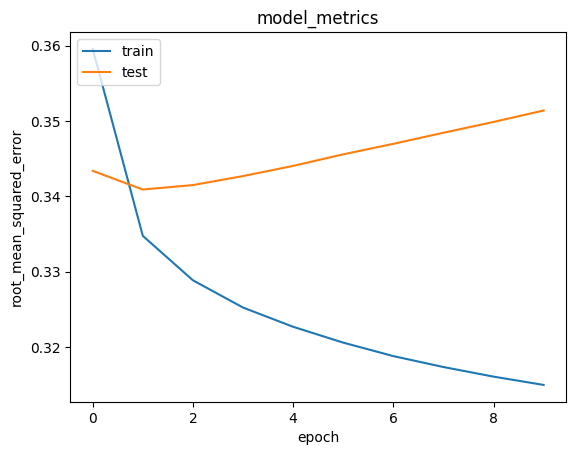

In [82]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Berdasarkan grafik "model_metrics", terlihat bahwa nilai root_mean_squared_error (RMSE) pada data training terus menurun seiring bertambahnya epoch, yang menunjukkan model semakin baik dalam mempelajari data pelatihan. Namun, nilai RMSE pada data test awalnya menurun kemudian mulai meningkat setelah epoch 1 atau 2. Ini berarti model mencapai performa optimalnya pada data test di awal epoch dan kemudian mulai kehilangan kemampuan generalisasinya.

## Mendapatkan Rekomendasi

In [83]:
import numpy as np

user_id = ratings_full['User-ID'].sample(1).iloc[0]

books_read_by_user = ratings_full[ratings_full['User-ID'] == user_id]

books_not_read = books_cleaned[~books_cleaned['ISBN'].isin(books_read_by_user['ISBN'].values)]['ISBN']
books_not_read = list(
    set(books_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

books_not_read = [[book_to_book_encoded.get(isbn)] for isbn in books_not_read]
user_encoder = user_to_user_encoded.get(user_id)

user_book_array = np.hstack(
    ([[user_encoder]] * len(books_not_read), books_not_read)
)

ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_isbns = [
    book_encoded_to_book.get(books_not_read[x][0]) for x in top_ratings_indices
]

8298/8298 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


Tampilkan hasil

In [84]:
print(f"Rekomendasi untuk User-ID: {user_id}")
print("=" * 30)
print("Buku dengan rating tertinggi dari user:")
print("-" * 40)

top_books_user = (
    books_read_by_user.sort_values(by='Book-Rating', ascending=False)
    .head(5)['ISBN'].values
)

book_info_rows = books_cleaned[books_cleaned['ISBN'].isin(top_books_user)]
for row in book_info_rows.itertuples():
    print(f"{row._2} by {row._3} | Publisher: {row.Publisher}")

print("-" * 40)
print("Top 10 Rekomendasi Buku untuk User:")
print("-" * 40)

recommended_books = books_cleaned[books_cleaned['ISBN'].isin(recommended_book_isbns)]
for row in recommended_books.itertuples():
    print(f"{row._2} by {row._3} | Publisher: {row.Publisher}")


Rekomendasi untuk User-ID: 244998
Buku dengan rating tertinggi dari user:
----------------------------------------
Timeline by MICHAEL CRICHTON | Publisher: Ballantine Books
The Beach by Alex Garland | Publisher: Riverhead Books
A Question of Blood: An Inspector Rebus Novel by Ian Rankin | Publisher: Little, Brown
Detective: A Novel by Arthur Hailey | Publisher: Berkley Publishing Group
Absolute Rage by Robert K. Tanenbaum | Publisher: Pocket Books
----------------------------------------
Top 10 Rekomendasi Buku untuk User:
----------------------------------------
Les Fleurs Du Mal by C. Baudelaire | Publisher: Livre De Poche French
The Outlandish Companion by DIANA GABALDON | Publisher: Delacorte Press
The Fellowship of the Ring (The Lord of the Rings, Part 1) by J. R. R. Tolkien | Publisher: Houghton Mifflin Company
The Baby Book: Everything You Need to Know About Your Baby from Birth to Age Two by Martha Sears | Publisher: Little, Brown
The Indispensable Calvin And Hobbes by Bill Wa

Untuk User ID 244998, daftar "Buku dengan rating tertinggi dari user" menunjukkan buku-buku yang secara personal disukai oleh pengguna tersebut berdasarkan rating yang diberikan. Daftar "Top 10 Rekomendasi Buku untuk User" berisi buku-buku baru yang disarankan oleh sistem rekomendasi, yang mungkin menarik bagi pengguna berdasarkan pola preferensi mereka atau pengguna lain yang serupa. Perbandingan kedua daftar ini dapat menunjukkan seberapa baik sistem rekomendasi menangkap preferensi pengguna atau memperkenalkan keragaman bacaan baru.

## Evaluasi

In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(x_val).flatten()
y_pred = y_pred * (max_rating - min_rating) + min_rating
y_actual = y_val * (max_rating - min_rating) + min_rating

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

6357/6357 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
Root Mean Squared Error (RMSE): 3.5608


Nilai RMSE menunjukkan bahwa secara rata-rata, prediksi model memiliki deviasi sekitar 3.56 poin dari nilai rating aktual.
Karena rating buku dalam dataset berada pada skala 1–10, nilai ini mengindikasikan bahwa prediksi masih cukup jauh dari rating sebenarnya, dan model memerlukan perbaikan lebih lanjut (misalnya dengan tuning dimensi embedding, jumlah epoch, atau regularisasi).